# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices


In [44]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration


In [45]:
#  Minimum price of the data

minimum_price = np.min(prices)

#  Maximum price of the data
maximum_price = np.max(prices)


# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

#  Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


----

## Developing a Model


### Implementation: Define a Performance Metric


In [46]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

###  Shuffle and Split Data


In [48]:
# TImport 'train_test_split'
from sklearn.model_selection import train_test_split
#  Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


----

## Analyzing Model Performance


### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

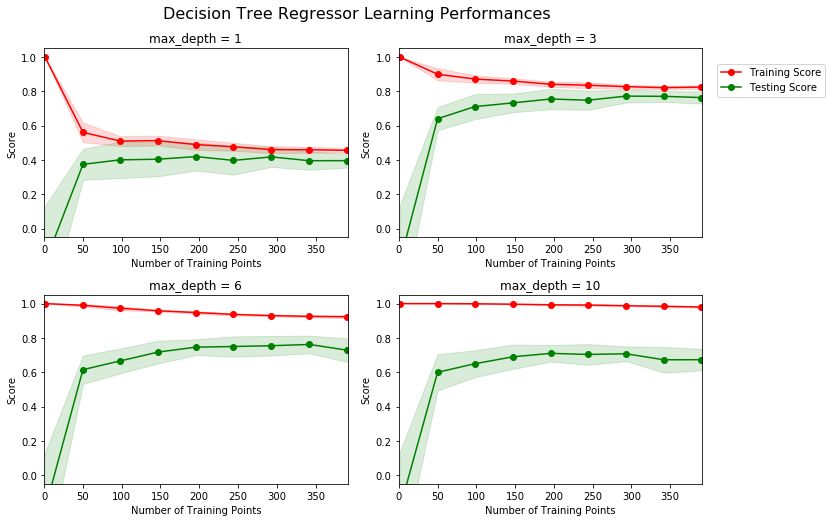

In [49]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

** When adding more train points,the score of training curve decrease,but the score of testing curve increase.And when the number of training data get to some point,both of curve tend to be horizontal.Yes,in figure1 and figure2,more data can benifit the model,making two cure converge, but in figure3,figure4 when two curve tend to horizontal,more data have no apparent henifit to the model**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

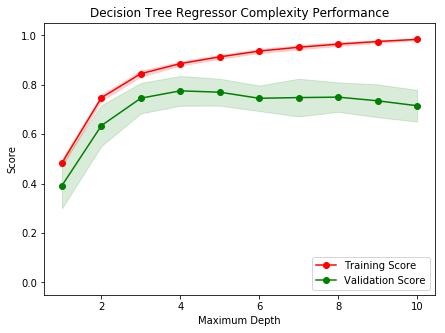

In [50]:
vs.ModelComplexity(X_train, y_train)

### Question Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer:When the model is trained with a maximum depth of 1, the model suffer from high variance ,because the slope of both line is so high,which is sensitive to and with 10,it suffer from high bias.
When train score line and validation score line split apparently,the learning algorithm tend to overfitting.So we choose the spliting point as our best maximum depth.**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: Grid Search is the way to try different combination of parameter to our algorithm,and to find the best performed combination of parameter to create our algorithm..First we create a map of different parameter,the GridSearchCV will automatically try all the possiable combination of parameter to create the model,then we use the data to train all of the model,to find the highest score model. **

### Question  Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer:k-fold cross-validation is a way to split our training data into k parts,alternately use k-1 of parts as training data and the rest one part as test data to validate our algorithm. k-fold cross can let us use all the data to train and all the data to test,which will give us an more accurate evaluation of learning algorithm.We ues cross validation to validate all of the model that grid search created,and calculate the average score of every model,then pick the best performanced model.**

### Implementation: Fitting a Model


In [51]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data , 
    # cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit( X.shape[0],test_size = 0.20, random_state = 0)
    #  Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,3,4,5,6,7,8,9,10]}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions


### Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [52]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Question Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [53]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: I recommend Client1's dwelling price is 390,000,Client2 is190,000 and Client3 is 940,000.It is reasonable,because the maximum price is 1,024,800,the maximum RM is 8.398、the lowest LSTAT and PTRATIO  are 1.98、12.6 respectively,which is close to Client3's value，so the price is also close to the maximum price。
the mean of RM,LSTAT,PTRATIO are 6.24,12.94,18.52 respectively.For Client1 the value of feature approximate the mean value,RM is less than the mean,LSTAT larger than mean and PTRATION,so client1's price are lower than the mean price.For client 2,have less RM, higer poverty level and higher Student-teacher ratio than client1，so the price is lower than client1's.So,the prediction is reasonable.
**